<a href="https://colab.research.google.com/github/GitData-GA/GenAI/blob/gh-pages/r/example/txt_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installation & Setup

In [ ]:
# The following commands are for Colab only
system('add-apt-repository -y ppa:cran/imagemagick')
system('apt-get update')
system("apt-get install libmagick++-dev")

In [ ]:
# Install the library (usually 1 - 3 minutes in Colab)
install.packages("GenAI")
library("GenAI")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Rcpp’, ‘gridGraphics’, ‘yulab.utils’, ‘listenv’, ‘magick’, ‘ggplotify’


Loading required package: magrittr



# Get Available Models

In [ ]:
all.models = available.models() %>% print()

$google
$google$version
[1] "v1"     "v1beta"

$google$model
[1] "gemini-pro"                   "gemini-pro-vision"           
[3] "gemini-1.0-pro"               "gemini-1.0-pro-001"          
[5] "gemini-1.0-pro-latest"        "gemini-1.0-pro-vision-latest"


$openai
$openai$version
[1] "v1"

$openai$model
[1] "gpt-3.5-turbo"        "gpt-3.5-turbo-1106"   "gpt-3.5-turbo-16k"   
[4] "gpt-4"                "gpt-4-1106-preview"   "gpt-4-32k"           
[7] "gpt-4-vision-preview" "dall-e-2"             "dall-e-3"            


$moonshot
$moonshot$version
[1] "v1"

$moonshot$model
[1] "moonshot-v1-8k"   "moonshot-v1-32k"  "moonshot-v1-128k"




# Prepare an Image

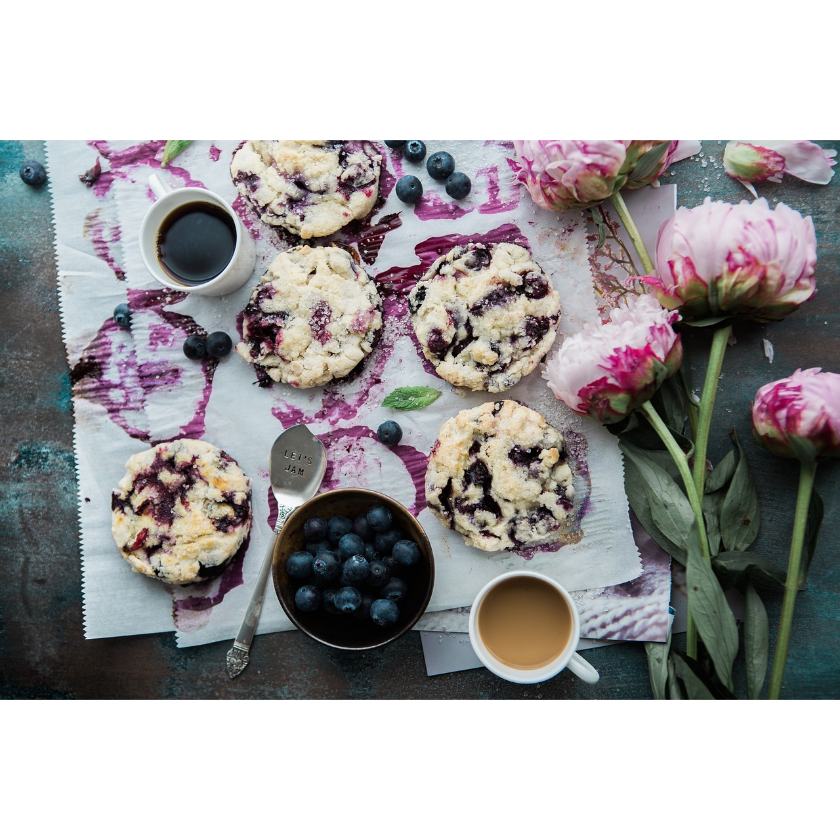

In [ ]:
download.file("https://storage.googleapis.com/generativeai-downloads/images/scones.jpg",
              "example.jpg",
              mode = 'wb')
ggplotify::as.ggplot(magick::image_read("example.jpg"))

# Example for Google Generative AI

In [ ]:
# Please change YOUR_GOOGLE_API to your own API key of Google Generative AI
Sys.setenv(GOOGLE_API = "YOUR_GOOGLE_API")

In [ ]:
# Create a Google Generative AI object
google = genai.google(api = Sys.getenv("GOOGLE_API"),
                      model = all.models$google$model[2],
                      version = all.models$google$version[1],
                      proxy = FALSE)

# Generation configurations
parameters = list(
  harm.category.dangerous.content = 5,
  harm.category.harassment = 5,
  max.output.tokens = 4096,
  temperature = 0.9
)

In [ ]:
# Method 1 (recommended): use the pipe operator "%>%"
google %>%
  txt.image(prompt = "Please describe the following image.",
            image.path = "https://storage.googleapis.com/generativeai-downloads/images/scones.jpg",
            verbose = FALSE,
            config = parameters) %>%
  cat()

 The image shows a white surface with pink and purple stains. On the surface are five scones with blueberries on top of them. There are also three small white bowls. One bowl is filled with blueberries, the second bowl has a silver spoon in it, and the third bowl is empty. Next to the scones are two cups of coffee and three pink flowers.

In [ ]:
# Method 2: use the reference operator "$"
cat(google$txt.image(prompt = "Please describe the following image.",
                     image.path = "https://storage.googleapis.com/generativeai-downloads/images/scones.jpg",
                     verbose = FALSE,
                     config = parameters))

 There are six blueberry scones on a white surface. There are also three small white bowls, two filled with blueberries and one with a silver spoon. There are pink flowers and green leaves on the table. There are also two white cups filled with coffee.

In [ ]:
# Method 3: use the function txt.image() directly
# Set verbose to TRUE to see the detail
cat(txt.image(genai.object = google,
              prompt = "Please describe the following image.",
              image.path = "example.jpg",
              verbose = TRUE,
              config = parameters))

   Safety Settings
-----------------------------------------------------------------------------
HARM_CATEGORY_DANGEROUS_CONTENT: BLOCK_NONE 
HARM_CATEGORY_HARASSMENT: BLOCK_NONE 



   Generation Configuration
-----------------------------------------------------------------------------
maxOutputTokens: 4096 
temperature: 0.9 



   Prompt
-----------------------------------------------------------------------------
Please describe the following image.



   Image Path
-----------------------------------------------------------------------------
example.jpg




 The image shows a table with a white tablecloth. On the table are two cups of coffee, a bowl of blueberries, a silver spoon, and five scones with blueberries. Next to the plate is a peony flower.

# Example for OpenAI

In [ ]:
# Please change YOUR_OPENAI_API to your own API key of OpenAI
Sys.setenv(OPENAI_API = "YOUR_OPENAI_API")

# Please change YOUR_OPENAI_ORG to your own organization ID for OpenAI
Sys.setenv(OPENAI_ORG = "YOUR_OPENAI_ORG")

In [ ]:
# Create an OpenAI object
openai = genai.openai(api = Sys.getenv("OPENAI_API"),
                      model = all.models$openai$model[7],
                      version = all.models$openai$version[1],
                      proxy = FALSE,
                      organization.id = Sys.getenv("OPENAI_ORG"))

# Generation configurations
parameters = list(
  frequency.penalty = 1,
  max.tokens = 3000,
  temperature = 0.9
)

In [ ]:
# Method 1 (recommended): use the pipe operator "%>%"
openai %>%
  txt.image(prompt = "Please describe the following image.",
            image.path = "https://storage.googleapis.com/generativeai-downloads/images/scones.jpg",
            verbose = FALSE,
            config = parameters) %>%
  cat()

The image shows a beautifully arranged still life of food and flowers on a textured surface. There are several freshly baked scones with blueberries visible in their crumbly texture, scattered casually across the table. A few loose blueberries are also present around the scones.

To the left of the image, there's a small white cup filled with coffee alongside an empty bowl that once contained blueberries, signaled by a few remaining fruits and juice stains at its bottom. There's also an elegant metal spoon with a whimsical engraving that reads "LET'S JAM."

On the right side of the photograph, fresh flowers—peonies with deep pink and white hues—are laid out, adding to the aesthetic appeal of the scene. Their petals show hints of wear, suggesting they're not freshly cut which adds to their natural charm.

A muted backdrop complements this setting without distracting from it. The overall effect is rustic yet delicate—a snapshot that evokes a sense of homeliness and warmth likely intended

In [ ]:
# Method 2: use the reference operator "$"
cat(openai$txt.image(prompt = "Please describe the following image.",
                     image.path = "https://storage.googleapis.com/generativeai-downloads/images/scones.jpg",
                     verbose = FALSE,
                     config = parameters))

The image shows a rustic and visually appealing layout of food and flowers on a textured surface. There are several fresh-baked scones with blueberries visible within them, scattered across some parchment paper that is stained with splotches of what appears to be purple jam. Among the scones, there's a small bowl filled with fresh blueberries.

To the left of the image is a cup of espresso or black coffee next to an antique teaspoon engraved with "LET'S JAM." To the right side, there's another cup containing what looks like coffee with milk or cream.

The composition is completed by several pinkish-white peonies with green leaves that are casually placed in the upper right corner, introducing a natural and delicate element to this culinary scene. The overall appearance suggests an indulgent morning tea or coffee break featuring freshly baked goods and flowers for an aesthetic touch.

In [ ]:
# Method 3: use the function txt.image() directly
# Set verbose to TRUE to see the detail
cat(txt.image(genai.object = openai,
              prompt = "Please describe the following image.",
              image.path = "example.jpg",
              verbose = TRUE,
              config = parameters))

   Generation Configuration
-----------------------------------------------------------------------------
frequency_penalty: 1 
max_tokens: 3000 
temperature: 0.9 



   Prompt
-----------------------------------------------------------------------------
Please describe the following image.



   Image Path
-----------------------------------------------------------------------------
example.jpg




The image displays a beautifully arranged scene with food and flowers, likely set for a relaxed breakfast or brunch. There are several items on a textured surface:

- A cluster of fresh blueberry scones with visible berries and sugar sprinkled on top.
- Scattered blueberries around the scones, hinting at the primary ingredient.
- Two cups; one contains what appears to be black coffee and the other holds coffee with cream.
- A small bowl filled with more blueberries, accompanied by a vintage-style metal spoon that has "LET'S JAM" stamped into it, suggesting a playful tone about enjoying jam 